In [102]:
import numpy as np
correlations = np.load("./correlations.pkl.npy")
check = np.load("./check.pkl.npy")

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

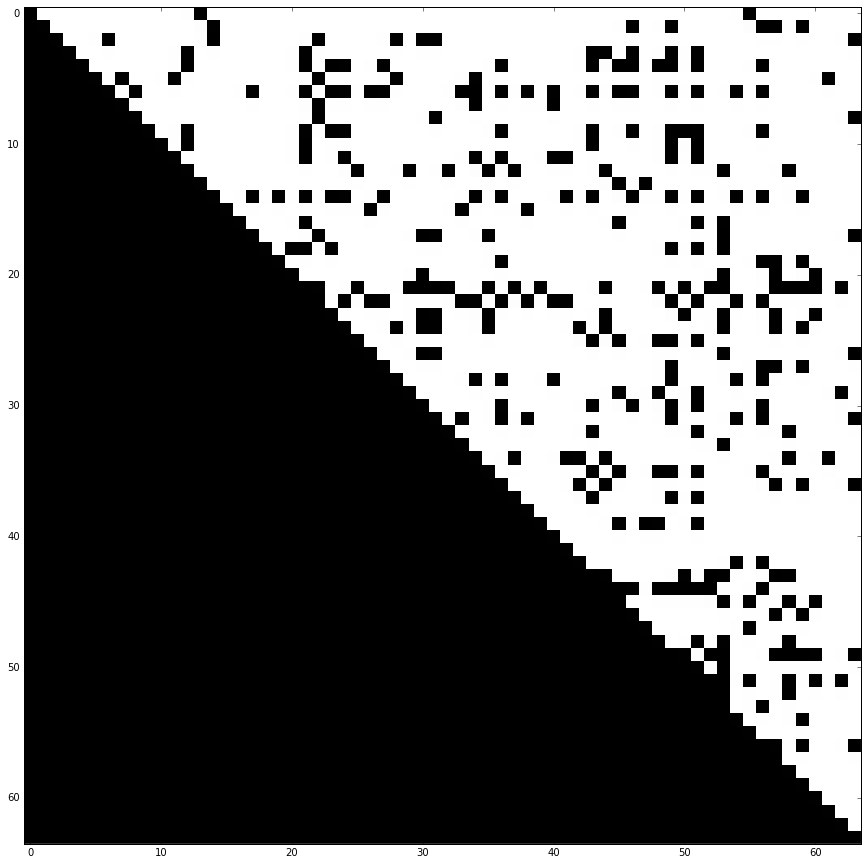

In [104]:
# GPU correlations (symptomatic that the first diagonals (8-blocks) are 0 (== black) always
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(correlations, cmap="gray", interpolation="none")

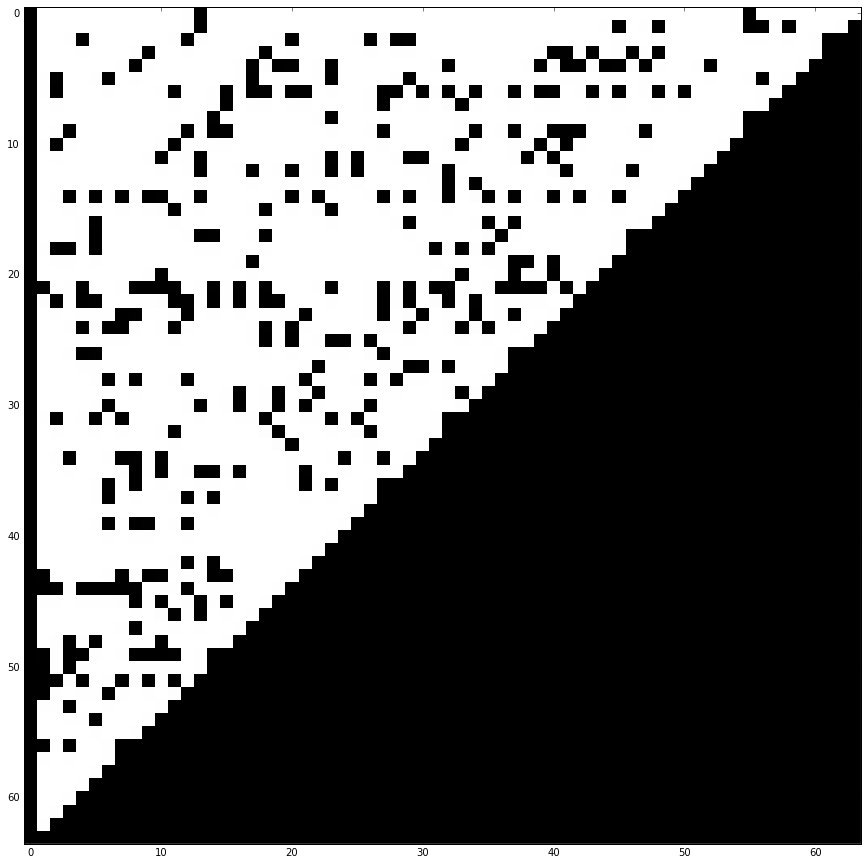

In [105]:
# Ground truth (seems wrong...diagonal not white == 1)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(check, cmap="gray", interpolation="none")

In [106]:
check.shape

(64, 64)

In [107]:
# INCORRECT? if i put <= the first column will not be black, but white, so that's the changing one
# matches image above
# let's do it again, recalculate ground truth 
x = np.load("./x.pkl.npy")
y = np.load("./y.pkl.npy")
z = np.load("./z.pkl.npy")
ct = np.load("./ct.pkl.npy")
check1 = np.zeros_like(correlations)
for i in range(check1.shape[0]):
        for j in range(i, i + check1.shape[1]):
            if j < check1.shape[0]:
                if (ct[i]-ct[j])**2 < (x[i]-x[j])**2  + (y[i] - y[j])**2 + (z[i] - z[j])**2:
                    check1[i, j-i] = 1

In [108]:
check1.shape

(64, 64)

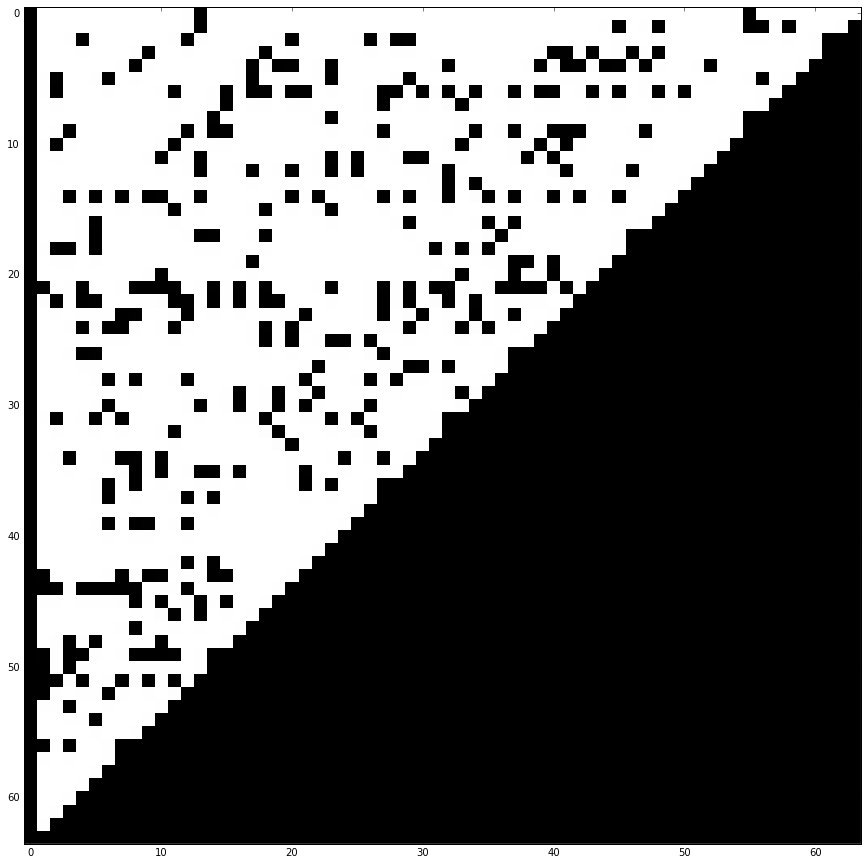

In [109]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(check1, cmap="gray", interpolation="none")

In [110]:
N = check.shape[0]
np.abs(check - check1).max()

0

In [111]:
hits_method1 = np.identity(N, 'int')
for i in range(hits_method1.shape[0]):
    for j in range(i+1, hits_method1.shape[1]):
        # number_of_pairs_investigated += 1
        if (ct[i]-ct[j])**2 < (x[i]-x[j])**2  + (y[i] - y[j])**2 + (z[i] - z[j])**2:
            # correlated_pairs += 1
            hits_method1[i, j] = 1

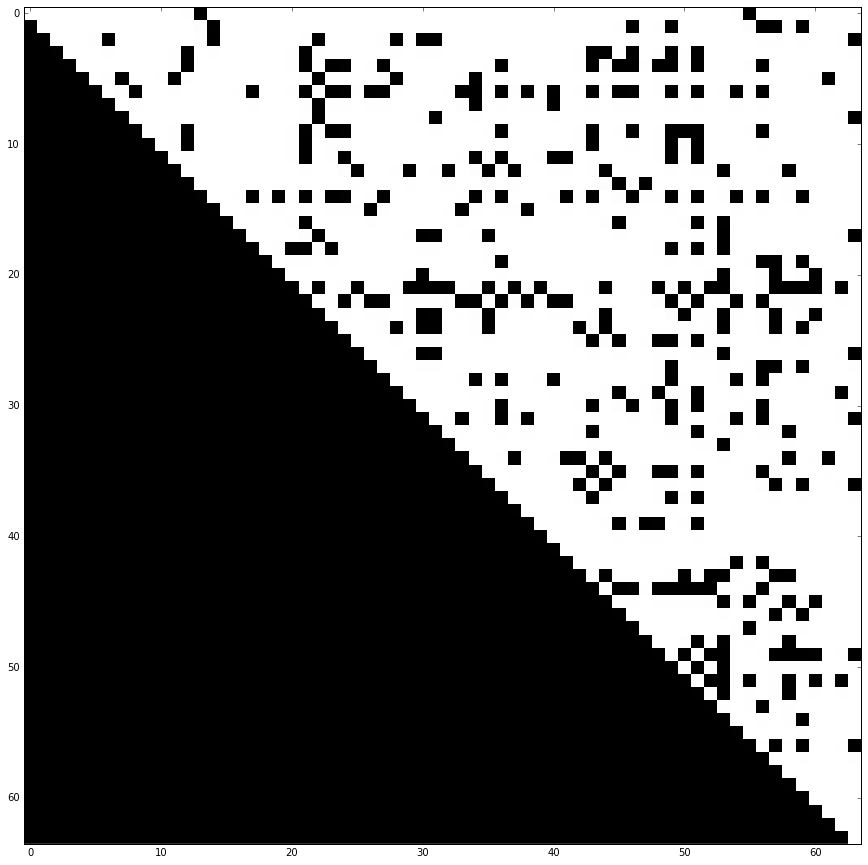

In [112]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(hits_method1, cmap="gray", interpolation="none")

In [18]:
x

array([ 0.63854563,  0.72903442,  0.77806586,  0.80887252,  0.60416883,
        0.33565792,  0.11569205,  0.89600539,  0.77068204,  0.23558268,
        0.23499303,  0.34131283,  0.00129156,  0.36233369,  0.55223262,
        0.64142096,  0.85779226,  0.46257111,  0.42492223,  0.63639224,
        0.68155646,  0.76561242,  0.66132605,  0.3440159 ,  0.05161248,
        0.29734123,  0.84269965,  0.86160159,  0.65145099,  0.82998157,
        0.38339663,  0.0107746 ,  0.5426538 ,  0.14880532,  0.98712689,
        0.71423501,  0.97566128,  0.61349279,  0.69818747,  0.14939471,
        0.48479396,  0.31511134,  0.88447642,  0.88789713,  0.77854884,
        0.35288945,  0.76840037,  0.41376063,  0.96593839,  0.66705841,
        0.83319789,  0.66290396,  0.23042025,  0.22235006,  0.06040345,
        0.63547707,  0.22153218,  0.55941916,  0.44902775,  0.69268405,
        0.49954447,  0.12972771,  0.85692888,  0.88995528], dtype=float32)

In [53]:
correlations.shape

(64, 64)

dtype('int8')